# Laboratory notes

## Prerequisistes
Here we will implement our first quantum circuit using the python library `Qiskit`.
In order to run the code, remember to install the dependencies:
```shell
pip install qiskit qiskit[visualization] qiskit-aer
```
Let's import the function we will use:

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

In [2]:
simulator = QasmSimulator()
# declare a circuit with 2 qubits and 2 classical bits
circuit = QuantumCircuit(2, 2)

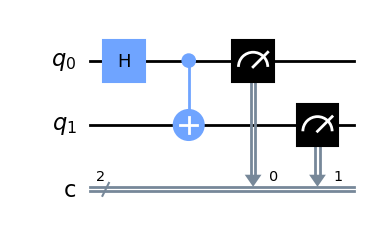

In [3]:
# apply a Hadamard gate to the qubit 0
circuit.h(0)
# apply a C-X gate on quibit 1 using qubit 0 as control
circuit.cx(0, 1)
# measure both qubits, storing values into classical bits
circuit.measure([0, 1], [0, 1])
circuit.draw(output='mpl')

In [4]:
# transpile (i.e. "compile") the circuit to run on the simulator
compiled_circuit = transpile(circuit, simulator)
# run the circuit on the simulator and get the results
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()


Total count for 00 and 11 are: {'11': 478, '00': 522}


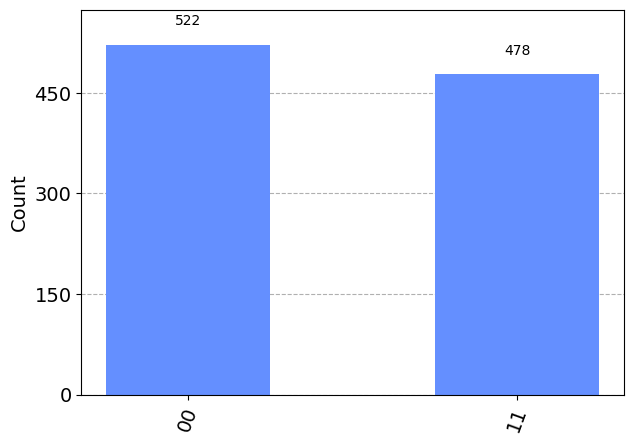

In [5]:
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:", counts)

plot_histogram(counts)